# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set,  which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.  

## Objectives
You will be able to:
* Show mastery of the content covered in this section

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head(10)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [3]:
df.tail()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
332,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [5]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [6]:
df.mean()

ID         250.951952
crim         3.360341
zn          10.689189
indus       11.293483
chas         0.060060
nox          0.557144
rm           6.265619
age         68.226426
dis          3.709934
rad          9.633634
tax        409.279279
ptratio     18.448048
black      359.466096
lstat       12.515435
medv        22.768769
dtype: float64

In [7]:
print("crim = crime rate per capita\n")
print('average crime rate = '+str(df.crim.mean()))
print('lowest town crime rate = '+str(df.crim.min()))
print('highest town crime rate = '+str(df.crim.max())+'\n')
print('crime rate at 25th quartile = '+str(df.crim.quantile(.25)))
print('crime rate median = '+str(df.crim.median()))
print('crime rate at 75th quartile = '+str(df.crim.quantile(.75))+'\n')
print('standard deviation = '+str(df.crim.std()))

crim = crime rate per capita

average crime rate = 3.360341471471471
lowest town crime rate = 0.00632
highest town crime rate = 73.5341

crime rate at 25th quartile = 0.07896
crime rate median = 0.26169000000000003
crime rate at 75th quartile = 3.6782199999999996

standard deviation = 7.3522718367811075


In [8]:
print("rm = average number of rooms per dwelling\n")
print('average number = '+str(df.rm.mean()))
print('number in town with fewest rooms = '+str(df.rm.min()))
print('number in town with most rooms = '+str(df.rm.max())+'\n')
print('rooms/dwelling 25th quartile = '+str(df.rm.quantile(.25)))
print('rooms/dwelling median = '+str(df.rm.median()))
print('rooms/dwelling at 75th quartile = '+str(df.rm.quantile(.75))+'\n')
print('standard deviation = '+str(df.rm.std()))

rm = average number of rooms per dwelling

average number = 6.265618618618616
number in town with fewest rooms = 3.5610000000000004
number in town with most rooms = 8.725

rooms/dwelling 25th quartile = 5.8839999999999995
rooms/dwelling median = 6.202000000000001
rooms/dwelling at 75th quartile = 6.595

standard deviation = 0.7039515757334481


In [9]:
print("age = proportion of owner-occupied units built before 1940\n")
print('average older units = '+str(df.age.mean()))
print('fewest older units = '+str(df.age.min()))
print('most older units = '+str(df.age.max())+'\n')
print('older units 25th quartile = '+str(df.age.quantile(.25)))
print('older units median = '+str(df.age.median()))
print('older units at 75th quartile = '+str(df.age.quantile(.75))+'\n')
print('standard deviation = '+str(df.age.std()))

age = proportion of owner-occupied units built before 1940

average older units = 68.22642642642641
fewest older units = 6.0
most older units = 100.0

older units 25th quartile = 45.4
older units median = 76.7
older units at 75th quartile = 93.8

standard deviation = 28.13334360562339


In [10]:
print("ptratio = pupil-teacher ratio by town\n")
print('average ratio = '+str(df.ptratio.mean()))
print('lowest ratio in a town = '+str(df.ptratio.min()))
print('highest ratio in a town = '+str(df.ptratio.max())+'\n')
print('ratio 25th quartile = '+str(df.ptratio.quantile(.25)))
print('ratio median = '+str(df.ptratio.median()))
print('ratio at 75th quartile = '+str(df.ptratio.quantile(.75))+'\n')
print('standard deviation = '+str(df.ptratio.std()))

ptratio = pupil-teacher ratio by town

average ratio = 18.448048048047994
lowest ratio in a town = 12.6
highest ratio in a town = 21.2

ratio 25th quartile = 17.4
ratio median = 19.0
ratio at 75th quartile = 20.2

standard deviation = 2.151821329439083


In [11]:
# I wonder how the student to teacher ratio varies compared to the average number of rooms in a dwelling, or the general age of the units
# Crime rate is assumed to be negatively correlated with education, so I wanted to see this comparison as well

In [12]:
df.loc[:,("age","rm","ptratio","crim")].head(15)

,age,rm,ptratio,crim
0,65.2,6.575,15.3,0.00632
1,78.9,6.421,17.8,0.02731
2,45.8,6.998,18.7,0.03237
3,54.2,7.147,18.7,0.06905
4,66.6,6.012,15.2,0.08829
5,94.3,6.377,15.2,0.22489
6,82.9,6.009,15.2,0.11747
7,39.0,5.889,15.2,0.09378
8,61.8,5.949,21.0,0.62976
9,84.5,6.096,21.0,0.63796


In [13]:
lowerptratio = df.loc[df.ptratio<16.5]
print("Number of cities with a ratio lower than 15 to 1: "+str(lowerptratio.ptratio.count()))
print("Average crime rates in those cities: "+str(lowerptratio.crim.mean()))
print("Average number of rooms per dwelling for these cities: "+str(lowerptratio.rm.mean()))
print("Average proportion of older homes for these cities: "+str(lowerptratio.age.mean()))
lowerptratio.head()

Number of cities with a ratio lower than 15 to 1: 63
Average crime rates in those cities: 0.7931442857142857
Average number of rooms per dwelling for these cities: 6.5876349206349225
Average proportion of older homes for these cities: 63.077777777777776


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7


In [14]:
evenlowerptratio = df.loc[df.ptratio<15]
print("Number of cities with a ratio lower than 15 to 1: "+str(evenlowerptratio.ptratio.count()))
print("Average crime rates in those cities: "+str(evenlowerptratio.crim.mean()))
print("Average number of rooms per dwelling for these cities: "+str(evenlowerptratio.rm.mean()))
print("Average proportion of older homes for these cities: "+str(evenlowerptratio.age.mean()))
evenlowerptratio.head()

Number of cities with a ratio lower than 15 to 1: 37
Average crime rates in those cities: 1.3051137837837838
Average number of rooms per dwelling for these cities: 6.629297297297299
Average proportion of older homes for these cities: 79.1243243243243


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
97,143,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
98,146,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403,14.7,172.91,27.80,13.8
99,148,2.36862,0.0,19.58,0,0.871,4.926,95.7,1.4608,5,403,14.7,391.71,29.53,14.6
100,149,2.33099,0.0,19.58,0,0.871,5.186,93.8,1.5296,5,403,14.7,356.99,28.32,17.8
101,150,2.73397,0.0,19.58,0,0.871,5.597,94.9,1.5257,5,403,14.7,351.85,21.45,15.4


In [15]:
upperptratio = df.loc[df.ptratio>20]
print("Number of cities with a ratio higher than 20 to 1: "+str(upperptratio.ptratio.count()))
print("Average crime rates in those cities: "+str(upperptratio.crim.mean()))
print("Average number of rooms per dwelling for these cities: "+str(upperptratio.rm.mean()))
print("Average proportion of older homes for these cities: "+str(upperptratio.age.mean()))

upperptratio.head()

Number of cities with a ratio higher than 20 to 1: 134
Average crime rates in those cities: 7.791268805970149
Average number of rooms per dwelling for these cities: 5.959888059701492
Average proportion of older homes for these cities: 86.02014925373136


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
10,16,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
11,17,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58,23.1
12,19,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,288.99,11.69,20.2


**My Observation:** The majority of the cities with higher crime rates are in cities with a higher ratio of students to teachers.

In [18]:
# I'm interested to see the relationship between the number of older units and the crime rate.

In [19]:
df.loc[:,("age","crim")].head()

,age,crim
0,65.2,0.00632
1,78.9,0.02731
2,45.8,0.03237
3,54.2,0.06905
4,66.6,0.08829


In [20]:
moreolder = df.loc[df.age>85]
print("Number of cities with more than 85% older units: "+str(moreolder.age.count()))
print("Average crime rates in those cities: "+str(moreolder.crim.mean()))

moreolder.head()

Number of cities with more than 85% older units: 131
Average crime rates in those cities: 6.836158854961831


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
13,21,1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02,13.6
14,22,0.85204,0.0,8.14,0,0.538,5.965,89.2,4.0123,4,307,21.0,392.53,13.83,19.6
15,23,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307,21.0,396.90,18.72,15.2
16,24,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307,21.0,394.54,19.88,14.5


In [21]:
fewerolder = df.loc[df.age<20]
print("Number of cities with less than 20% older units: "+str(fewerolder.age.count()))
print("Average crime rates in those cities: "+str(fewerolder.crim.mean()))

fewerolder.head()

Number of cities with less than 20% older units: 23
Average crime rates in those cities: 0.12658608695652174


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
23,41,0.03359,75.0,2.95,0,0.428,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
24,43,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81,25.3
25,44,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,3,233,17.9,394.46,7.44,24.7
43,66,0.03584,80.0,3.37,0,0.398,6.290,17.8,6.6115,4,337,16.1,396.90,4.67,23.5
47,71,0.08826,0.0,10.81,0,0.413,6.417,6.6,5.2873,4,305,19.2,383.73,6.72,24.2


In [22]:
evenfewerolder = df.loc[df.age<10]
print("Number of cities with less than 10% older units: "+str(evenfewerolder.age.count()))
print("Average crime rates in those cities: "+str(evenfewerolder.crim.mean()))

evenfewerolder.head()

Number of cities with less than 10% older units: 11
Average crime rates in those cities: 0.16155727272727272


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
24,43,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81,25.3
25,44,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,3,233,17.9,394.46,7.44,24.7
47,71,0.08826,0.0,10.81,0,0.413,6.417,6.6,5.2873,4,305,19.2,383.73,6.72,24.2
48,73,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
49,74,0.19539,0.0,10.81,0,0.413,6.245,6.2,5.2873,4,305,19.2,377.17,7.54,23.4


**My Observation:** Generally there is a decrease in the crime rate as the percentage of older homes in the town decreases.

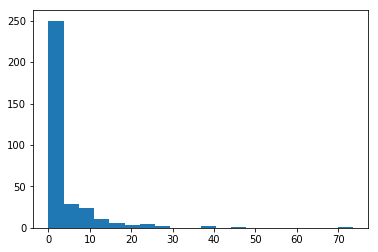

In [28]:
x = df.crim

crimehistogram = plt.hist(x,bins=20)

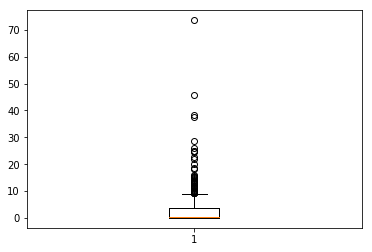

In [35]:
crimeboxplot = plt.boxplot(x,showfliers=True)

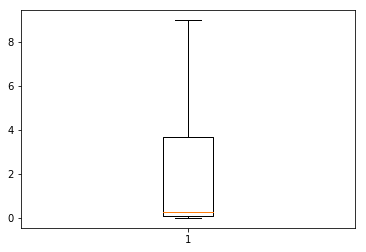

In [36]:
crimeboxplot2 = plt.boxplot(x,showfliers=False)

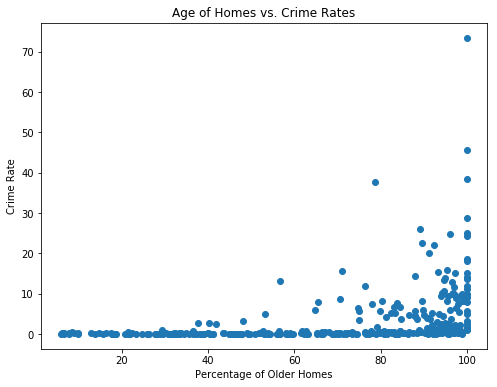

In [39]:
plt.figure(figsize=(8,6))

plt.scatter(df.age,df.crim)

plt.title('Age of Homes vs. Crime Rates')
plt.xlabel('Percentage of Older Homes')
plt.ylabel('Crime Rate')

plt.show()

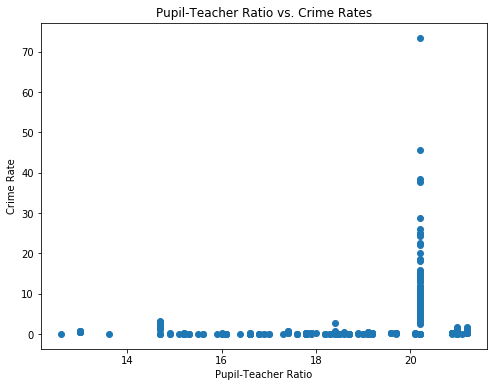

In [40]:
plt.figure(figsize=(8,6))

plt.scatter(df.ptratio,df.crim)

plt.title('Pupil-Teacher Ratio vs. Crime Rates')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Crime Rate')

plt.show()

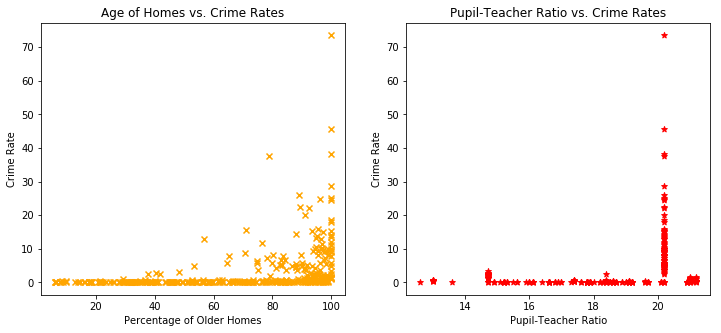

In [64]:
newfig = plt.figure(figsize=(12,5))

ax1 = newfig.add_subplot(121)
ax2 = newfig.add_subplot(122)

df.ptratio,df.crim

ax1.set_title('Age of Homes vs. Crime Rates')
ax1.set_xlabel('Percentage of Older Homes')
ax1.set_ylabel('Crime Rate')

ax2.set_title('Pupil-Teacher Ratio vs. Crime Rates')
ax2.set_xlabel('Pupil-Teacher Ratio')
ax2.set_ylabel('Crime Rate')

ax1.scatter(df.age,df.crim,marker="x",color="orange")
ax2.scatter(df.ptratio,df.crim,marker="*",color="red")

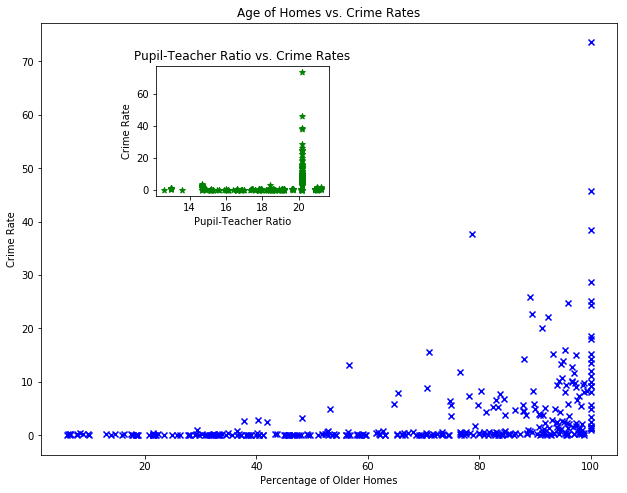

In [68]:
newfig2 = plt.figure(figsize=(8,6))

ax1 = newfig2.add_axes([0,0,1,1])
ax2 = newfig2.add_axes([.2,.6,.3,.3])

ax1.set_title('Age of Homes vs. Crime Rates')
ax1.set_xlabel('Percentage of Older Homes')
ax1.set_ylabel('Crime Rate')

ax2.set_title('Pupil-Teacher Ratio vs. Crime Rates')
ax2.set_xlabel('Pupil-Teacher Ratio')
ax2.set_ylabel('Crime Rate')

ax1.scatter(df.age,df.crim,marker="x",color="blue")
ax2.scatter(df.ptratio,df.crim,marker="*",color="green")

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!